# Unit 2 Build

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

## Model Interpretation ##
- [ ] Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Make at least 1 Shapley force plot to explain an individual prediction.
- [ ] **Share at least 1 visualization (of any type) on Slack!**

If you aren't ready to make these plots with your own dataset, you can practice these objectives with any dataset you've worked with previously. Example solutions are available for Partial Dependence Plots with the Tanzania Waterpumps dataset, and Shapley force plots with the Titanic dataset. (These datasets are available in the data directory of this repository.)

Please be aware that **multi-class classification** will result in multiple Partial Dependence Plots (one for each class), and multiple sets of Shapley Values (one for each class).

## Stretch Goals

#### Partial Dependence Plots
- [ ] Make multiple PDPs with 1 feature in isolation.
- [ ] Make multiple PDPs with 2 features in interaction. 
- [ ] Use Plotly to make a 3D PDP.
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox. Get readable category names on your plot, instead of integer category codes.

#### Shap Values
- [ ] Make Shapley force plots to explain at least 4 individual predictions.
    - If your project is Binary Classification, you can do a True Positive, True Negative, False Positive, False Negative.
    - If your project is Regression, you can do a high prediction with low error, a low prediction with low error, a high prediction with high error, and a low prediction with high error.
- [ ] Use Shapley values to display verbal explanations of individual predictions.
- [ ] Use the SHAP library for other visualization types.

The [SHAP repo](https://github.com/slundberg/shap) has examples for many visualization types, including:

- Force Plot, individual predictions
- Force Plot, multiple predictions
- Dependence Plot
- Summary Plot
- Summary Plot, Bar
- Interaction Values
- Decision Plots

We just did the first type during the lesson. The [Kaggle microcourse](https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values) shows two more. Experiment and see what you can learn!

### Links

#### Partial Dependence Plots
- [Kaggle / Dan Becker: Machine Learning Explainability — Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-plots)
- [Christoph Molnar: Interpretable Machine Learning — Partial Dependence Plots](https://christophm.github.io/interpretable-ml-book/pdp.html) + [animated explanation](https://twitter.com/ChristophMolnar/status/1066398522608635904)
- [pdpbox repo](https://github.com/SauceCat/PDPbox) & [docs](https://pdpbox.readthedocs.io/en/latest/)
- [Plotly: 3D PDP example](https://plot.ly/scikit-learn/plot-partial-dependence/#partial-dependence-of-house-value-on-median-age-and-average-occupancy)

#### Shapley Values
- [Kaggle / Dan Becker: Machine Learning Explainability — SHAP Values](https://www.kaggle.com/learn/machine-learning-explainability)
- [Christoph Molnar: Interpretable Machine Learning — Shapley Values](https://christophm.github.io/interpretable-ml-book/shapley.html)
- [SHAP repo](https://github.com/slundberg/shap) & [docs](https://shap.readthedocs.io/en/latest/)

# Import, Wrangle, Split #

## Install Requirements and Import the Data ##

In [1]:
%%capture
import sys
    
!pip install yellowbrick

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders  # ==2.*
    !pip install eli5
    !pip install pdpbox
    !pip install shap

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Download the data
column_html = !curl https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized
raw_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00211/CommViolPredUnnormalizedData.txt'

In [2]:
# A UCI dataset for predicting crime rates (Unnormalized)
# https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized

import re
import pandas as pd

# Extract a list of column names and descriptions from the dataset's main webpage
# include "<br>  -- state: US state (by 2 letter postal abbreviation)(nominal)"
# include "<br>  -- householdsize: mean people per household (numeric - decimal)"
# avoid "<br>  -- Donor: Michael Redmond (redmond 'at' lasalle.edu); Computer Science; La Salle University; Philadelphia, PA, 19141, USA"
matches = [re.match('^<br>  -- (\S+): (.+)\((string|nominal|numeric).+$', line) for line in column_html]
matches = list(filter(None, matches))  # filter out non-matches that are None
column_names = [match.group(1) for match in matches]
column_descriptions = {match.group(1) : match.group(2).rstrip() for match in matches}

df = pd.read_csv(raw_data, names = column_names, na_values=['?'])
df

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39.0,5320.0,1,11980,3.10,1.37,91.78,6.50,...,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,Marpletownship,PA,45.0,47616.0,1,23123,2.82,0.80,95.57,3.44,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,Tigardcity,OR,NaN,NaN,1,29344,2.43,0.74,94.33,3.43,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
3,Gloversvillecity,NY,35.0,29443.0,1,16656,2.40,1.70,97.35,0.50,...,225.0,1301.78,716.0,4142.56,47.0,271.93,NaN,NaN,306.64,NaN
4,Bemidjicity,MN,7.0,5068.0,1,11245,2.76,0.53,89.16,1.17,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,NaN,9988.79
5,Springfieldcity,MO,NaN,NaN,1,140494,2.45,2.51,95.65,0.90,...,2094.0,1386.46,7690.0,5091.64,454.0,300.60,134.0,88.72,442.95,6867.42
6,Norwoodtown,MA,21.0,50250.0,1,28700,2.60,1.60,96.57,1.47,...,110.0,372.09,288.0,974.19,144.0,487.10,17.0,57.50,226.63,1890.88
7,Andersoncity,IN,NaN,NaN,1,59459,2.45,14.20,84.87,0.40,...,608.0,997.60,2250.0,3691.79,125.0,205.10,9.0,14.77,439.73,4909.26
8,Fargocity,ND,17.0,25700.0,1,74111,2.46,0.35,97.11,1.25,...,425.0,532.66,3149.0,3946.71,206.0,258.18,8.0,10.03,115.31,4747.58
9,Wacocity,TX,NaN,NaN,1,103590,2.62,23.14,67.60,0.92,...,2397.0,2221.81,6121.0,5673.63,1070.0,991.80,18.0,16.68,1544.24,8903.93


In [3]:
for i, (name, description) in enumerate(column_descriptions.items()):
  print(f'{i} {name:13} = "{description}"')
  if i == 50:
    break

0 communityname = "Community name - not predictive - for information only"
1 state         = "US state (by 2 letter postal abbreviation)"
2 countyCode    = "numeric code for county - not predictive, and many missing values"
3 communityCode = "numeric code for community - not predictive and many missing values"
4 fold          = "fold number for non-random 10 fold cross validation, potentially useful for debugging, paired tests - not predictive"
5 population    = "population for community:"
6 householdsize = "mean people per household"
7 racepctblack  = "percentage of population that is african american"
8 racePctWhite  = "percentage of population that is caucasian"
9 racePctAsian  = "percentage of population that is of asian heritage"
10 racePctHisp   = "percentage of population that is of hispanic heritage"
11 agePct12t21   = "percentage of population that is 12-21 in age"
12 agePct12t29   = "percentage of population that is 12-29 in age"
13 agePct16t24   = "percentage of population t

## Data Wrangling ##

In [4]:
# Feature Engineering Time!

# Spoiler alert! None of the features in this dataset appear to be leaky. For one, R^2's are in the 0.5 - 0.65 range.
# Also, the most important features are about family structure, not crime or posterior knowledge.

# When a column is dropped from df, it also needs to be dropped from column_names and column_descriptions
# Removes columns/values in place
# If column_name is not present, no errors are raised
def drop_column(column_name, data):
  # remove from the DataFrame
  data.drop(columns=[column_name], errors='ignore', inplace=True)

  # remove from the column_names list
  try:
    column_names.remove(column_name)
  except ValueError:
    # "that's nice dear"
    pass

  # remove from the column_descriptions dictionary
  column_descriptions.pop(column_name, None)

# Remove rows where my targets are null
# (turns out models don't like comparing their prediction to null)
# Even though ViolentCrimesPerPop and nonViolPerPop aren't used in my targets,
# if any of my targets contain a Nan, so do one of these.
good_rows = df[~(df.ViolentCrimesPerPop.isna() | df.nonViolPerPop.isna())]

# Unusable columns
# communityname - the name of the community as a string
# countyCode - an ID number
# communityCode - another ID number
# fold - a helper column for 10-fold cross validation
unusable_columns = ['communityname', 'countyCode', 'communityCode', 'fold']
for name in unusable_columns:
  drop_column(name, good_rows)

# Remove the "lemas columns." They 22 are columns on the size and structure of a police department
# but there are only observations for 343 communities, and 1872 missing observations.
lema_columns = [col for col in df.columns if df[col].isna().sum() == 1872]
for name in lema_columns:
  drop_column(name, good_rows)

# Create a smaller DataFrame (343,22) of just the lemas data
# May use for making better predicitons for these communities
# lemas = df[lema_columns]
# lemas = lemas[~df.LemasSwornFT.isna()]

# Finally split the columns up
# Y will be a dataframe of 8 columns, one for each crime rate per population.
# There are 4 violent crimes: murder, rapes, robberies, and assaults
# And 4 non violent crimes: burglaries, larcenies, auto thefts, and arsons
features = good_rows[column_names[:column_names.index('murders')]]
Y_raw = good_rows[column_names[column_names.index('murdPerPop'):column_names.index('ViolentCrimesPerPop'):2]]

print('Features', features.shape)
# print('Lemas', lemas.shape)
print(f'8 crimes per pop {Y_raw.shape}')

Features (1902, 103)
8 crimes per pop (1902, 8)


C:\Users\jrsla\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [5]:
# Features
print('Features', features.shape)
display(features.head())

# Lemas
# print('\nLemas', lemas.shape)
# display(lemas.head())

# Targets
print('\nTargets', Y_raw.shape)
display(Y_raw.head())

Features (1902, 103)


,state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
0,NJ,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,...,0,10.66,53.72,65.29,78.09,89.14,6.5,1845.9,9.63,0.0
1,PA,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,...,0,8.30,77.17,71.27,90.22,96.12,10.6,2186.7,3.84,0.0
2,OR,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,...,0,5.00,44.77,36.60,61.26,82.85,10.6,2780.9,4.37,0.0
5,MO,140494,2.45,2.51,95.65,0.90,0.95,18.09,32.89,20.04,...,4,1.49,64.35,42.29,70.61,85.66,70.4,1995.7,0.97,0.0
6,MA,28700,2.60,1.60,96.57,1.47,1.10,11.17,27.41,12.76,...,0,9.19,77.30,63.45,82.23,93.53,10.9,2643.5,9.62,0.0



Targets (1902, 8)


,murdPerPop,rapesPerPop,robbbPerPop,assaultPerPop,burglPerPop,larcPerPop,autoTheftPerPop,arsonsPerPop
0,0.00,0.00,8.20,32.81,114.85,1132.08,131.26,16.41
1,0.00,4.25,21.26,102.05,242.37,1598.78,110.55,4.25
2,8.30,16.60,154.95,38.74,758.14,4972.19,376.30,60.87
5,4.63,50.98,90.05,297.29,1386.46,5091.64,300.60,88.72
6,0.00,13.53,30.44,182.66,372.09,974.19,487.10,57.50


In [6]:
# There is only one null value in the OtherPerCap column. 
# Lets train an XGBoost model to intelligently impute the missing value.
import numpy as np
null_sums = features.isna().sum().to_numpy()
null_column_indexes = np.where(null_sums > 0)
null_columns = features.columns[null_column_indexes]

print(f"Columns containing nulls: {null_columns.to_list()}")
print(f"Nulls per column: {features[null_columns].isna().sum()}")

Columns containing nulls: ['OtherPerCap']
Nulls per column: OtherPerCap    1
dtype: int64


In [7]:
# What are the range of values in this 
features['OtherPerCap'].describe()

count      1901.000000
mean       9480.354024
std        8070.968529
min           0.000000
25%        5615.000000
50%        8205.000000
75%       11471.000000
max      137000.000000
Name: OtherPerCap, dtype: float64

In [8]:
# split the data
null_rows = features.OtherPerCap.isna()
X_train = features.drop(columns=['OtherPerCap'])[~null_rows]
X_test = features.drop(columns=['OtherPerCap'])[null_rows]

y_train = features['OtherPerCap'][~null_rows]
y_train = np.sqrt(y_train)  # OtherPerCap is naturally skewed and contains zeros, so sqrt normalizes it
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(1901, 102)
(1, 102)
(1901,)


C:\Users\jrsla\anaconda3\envs\unit2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



XGBoost Validation R^2 0.6676725593745696
The value to impute is 4216.9609375


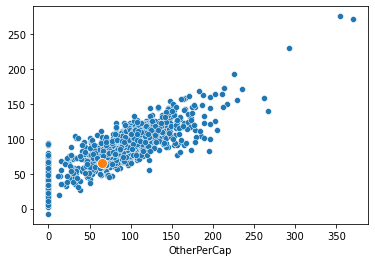

In [9]:
# XGBoost model predicting the one Nan value
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import seaborn as sns

model = make_pipeline(
    ce.OrdinalEncoder(cols=['state']), 
    XGBRegressor(n_estimators=100, objective='reg:squarederror', n_jobs=-1)
)
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
y_impute = model.predict(X_test)**2

print(f'\nXGBoost Validation R^2 {r2_score(y_train, y_pred)}')
print(f'The value to impute is {y_impute[0]}')

# Scatterplot to show where the imputed value falls and how precise the model is.
sns.scatterplot(x=y_train, y=y_pred)
sns.scatterplot(x=np.sqrt(y_impute), y=np.sqrt(y_impute), s=100);

In [10]:
# Actually impute the value
features.OtherPerCap[null_rows] = y_impute

C:\Users\jrsla\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jrsla\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:9116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\jrsla\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [11]:
# Confirm there's no more nulls
features.isna().sum().sum()

0

In [12]:
# And the same for Y for sanity
Y_raw.isna().sum().sum()

0

### Normalizing the Target Distribtuion ###

When doing a regression problem, a sound baseline is the mean, but means are only a good measure of center when the data has a symmetrical distribution, such as a normal distribution. All the crime rates are heavily skewed; most communities are low crime, and a few are high crime. The skew is extreme enough that model performance suffered when asked to make skewed predictions. We can unskew the data by taking the log of the crime rates, which brings the distribution into something similar to a normal distribution.

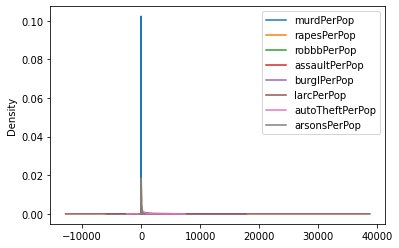

In [13]:
# What's the distributions of my targets?
Y_raw.plot.density();

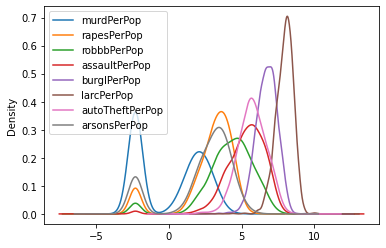

In [14]:
# Transform the targets into more normal distributions
import numpy as np

# there are many zeros in the violent crime rates, and the log of zero is -infinity
# Y_log = np.sqrt(Y)  # handles zeros but distributions are still skewed

# 0.1 is an order of magnitude below the lowest non-zero crime rate, so I substitute zero with that.
Y = np.log(Y_raw.replace(0, 0.1))

Y.plot.density();

# To transform the predictions back to the original scale
# y_pred_unlog = np.e**y_pred

However, this creates an artifact - many instances of -2.302585 which were zero in the original dataset (-2.302585 = ln(0.1)). This creates a distribution where the zeros are separated but still nearby the main distributions. This shouldn't be an issue for tree based models, which can handle nonmonotoic functions. Even though the original data was skewed left, zero still doesn't belong in it (since it's still two tailed and log zero approaches negative infinity). Zeros are therefore more like a missing value. Even though replacing 0 with 0.1 was arbitrary, I think it's better than replacing zero with Nan, or removing the rows, or imputing the mean. This new distribution is both true to the original character of the data, and something a model can work with as information.

## Splitting the Data ##

In [15]:
# Split the data
from sklearn.model_selection import train_test_split

# Split the training/val and test data
X_trainval, X_test, Y_trainval, Y_test, = train_test_split(
    features,
    Y,
    test_size=0.2,
    random_state=42,
    )

# Split the training and validation data
X_train, X_val, Y_train, Y_val = train_test_split(
    X_trainval,
    Y_trainval,
    train_size = 0.8,
    random_state = 42,
    )

print('Shapes')
print(f'X_train = {X_train.shape}, X_val = {X_val.shape}, X_test = {X_test.shape}')
print(f'Y_train = {Y_train.shape},   Y_val = {Y_val.shape},   Y_test = {Y_test.shape}')

Shapes
X_train = (1216, 103), X_val = (305, 103), X_test = (381, 103)
Y_train = (1216, 8),   Y_val = (305, 8),   Y_test = (381, 8)


# Predicting Crime Rates #

## Error Metric & Baseline ##
For an error metric, I chose the mean absolute error. This is both easy to understand, and still in the original unit of the data (still log transformed data though). It also allows for easy calculation of an improvement from the baseline. As for a baseline prediction, if we knew nothing at all about a community, our best guess at it's crime rates would be the median of each of the 8 crimes. And for a baseline error, use the mean absolute error (MAE) between the median and the actual data. From there, each predictive model will hopefully have a lower MAE than the baseline. Most of the time, I evaluate the models below as the percent improvement in MAE from the baseline.

In [16]:
import numpy as np
from sklearn.metrics import mean_absolute_error as mae

base_med = Y_trainval.median()
print(f'Baseline Prediction (median)\n{base_med}')

base_mae = base_med.copy()
for name, med in zip(Y_trainval.columns, base_med):
  column = Y_trainval[name]
  base_mae[name] = mae(column, np.full(column.shape, med))
print(f'\nBaseline Error (mean absolute error)\n{base_mae}')

Baseline Prediction (median)
murdPerPop         0.904218
rapesPerPop        3.299903
robbbPerPop        4.386765
assaultPerPop      5.456218
burglPerPop        6.761723
larcPerPop         8.024669
autoTheftPerPop    5.736992
arsonsPerPop       3.068518
dtype: float64

Baseline Error (mean absolute error)
murdPerPop         2.114519
rapesPerPop        1.191899
robbbPerPop        1.261385
assaultPerPop      1.000296
burglPerPop        0.568392
larcPerPop         0.459079
autoTheftPerPop    0.769080
arsonsPerPop       1.490871
dtype: float64


In [17]:
# Get the MAEs of a prediction vs the validation data
def maes(Y_pred, Y_val):
  Y_val = Y_val.to_numpy()
  pred_mae = base_med.copy()
  for i in range(len(pred_mae)):
    name = pred_mae.index[i]
    pred = Y_pred[:,i]
    test = Y_val[:,i]
    pred_mae[name] = mae(pred, test)
  return pred_mae

# Get improvements vs the baseline MAEs
def get_improvements(Y_pred, Y_val):
  pred_mae = maes(Y_pred, Y_val)
  improvements = 1 - pred_mae/base_mae
  return improvements

## Which Model to use? ##

### Linear Models ###

In [39]:
# A simple linear regression model for predicting crime rates
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.linear_model import LinearRegression

linear_model = make_pipeline(
    OrdinalEncoder(cols=['state']),
    LinearRegression(normalize=True, n_jobs=-1),
    )
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

linear_model.fit(X_train, Y_train);
Y_pred = linear_model.predict(X_val)

print("Linear Regression Model (MAE)")
print(maes(Y_pred, Y_val))

print("\nImprovements in MAE over Baseline")
improvements = get_improvements(Y_pred, Y_val)
print(improvements)
print(f"Total Improvement = {100*improvements.sum():.2f}%")

Linear Regression Model (MAE)
murdPerPop         1.302574
rapesPerPop        1.154697
robbbPerPop        0.825683
assaultPerPop      0.694854
burglPerPop        0.341613
larcPerPop         0.330875
autoTheftPerPop    0.449664
arsonsPerPop       1.480085
dtype: float64

Improvements in MAE over Baseline
murdPerPop         0.383985
rapesPerPop        0.031212
robbbPerPop        0.345415
assaultPerPop      0.305351
burglPerPop        0.398984
larcPerPop         0.279264
autoTheftPerPop    0.415322
arsonsPerPop       0.007235
dtype: float64
Total Improvement = 216.68%


/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [38]:
# A ridge model for predicting crime rates
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.linear_model import Ridge

ridge_model = make_pipeline(
    OrdinalEncoder(cols=['state']),
    # Ridge(alpha=1, normalize=True),
    Ridge(normalize=True),
    )
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

ridge_model.fit(X_train, Y_train);
Y_pred = ridge_model.predict(X_val)

print("Ridge Regression Model (MAE)")
print(maes(Y_pred, Y_val))

print("\nImprovements in MAE over Baseline")
improvements = get_improvements(Y_pred, Y_val)
print(improvements)
print(f"Total Improvement = {100*improvements.sum():.2f}%")

Ridge Regression Model (MAE)
murdPerPop         1.410835
rapesPerPop        1.027821
robbbPerPop        0.773862
assaultPerPop      0.664886
burglPerPop        0.342565
larcPerPop         0.325413
autoTheftPerPop    0.478106
arsonsPerPop       1.458089
dtype: float64

Improvements in MAE over Baseline
murdPerPop         0.332787
rapesPerPop        0.137662
robbbPerPop        0.386499
assaultPerPop      0.335310
burglPerPop        0.397307
larcPerPop         0.291162
autoTheftPerPop    0.378341
arsonsPerPop       0.021989
dtype: float64
Total Improvement = 228.11%


/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


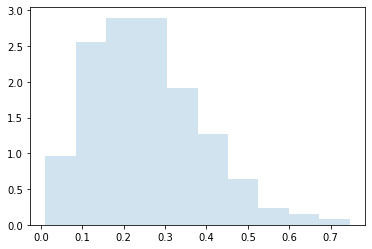

In [60]:
# Playing with a Rayleigh distribution, to get the parameters right
# This would make a good distribution of alpha values for ridge regression
from scipy.stats import rayleigh
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
# ray = rayleigh.pdf(x, loc, scale)
r = rayleigh.rvs(size=1000, loc=0.001, scale=0.2)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins=10)
plt.show()

In [64]:
# A randomized cross validation search on a ridge regression model
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import rayleigh
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rayleigh.html
# https://en.wikipedia.org/wiki/Rayleigh_distribution

ridge_model = make_pipeline(
    OrdinalEncoder(cols=['state']),
    Ridge(normalize=True),
    )

full = {
    'ridge__alpha': rayleigh(),
    'ridge__solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
}
focused = {
    'ridge__alpha': rayleigh(loc=0.01, scale=0.12),  # loc and scale act like the min and mode
    'ridge__solver': ['cholesky'],
}
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    ridge_model,
    param_distributions = focused, 
    n_iter=1000, 
    cv=5,
    scoring='explained_variance', 
    verbose=2, 
    return_train_score=True, 
    n_jobs=-1
)
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

search.fit(X_train, Y_train);

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 634 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 1930 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 2820 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 3874 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   31.4s finished


In [65]:
# How does the best Ridge model fair?
best_model = search.best_estimator_
Y_pred = best_model.predict(X_val)
print("Best Parameters:")
print(search.best_params_)

print("Ridge Regression Model (MAE)")
print(maes(Y_pred, Y_val))

print("\nImprovements in MAE over Baseline")
improvements = get_improvements(Y_pred, Y_val)
print(improvements)
print(f"Total Improvement = {100*improvements.sum():.2f}%")

pd.DataFrame(search.cv_results_).sort_values(by='rank_test_score').T  # mean_test_score, mean_fit_time

Best Parameters:
{'ridge__alpha': 0.12594987656227882, 'ridge__solver': 'cholesky'}
Ridge Regression Model (MAE)
murdPerPop         1.333168
rapesPerPop        1.071659
robbbPerPop        0.786595
assaultPerPop      0.657992
burglPerPop        0.334100
larcPerPop         0.317551
autoTheftPerPop    0.455187
arsonsPerPop       1.437485
dtype: float64

Improvements in MAE over Baseline
murdPerPop         0.369517
rapesPerPop        0.100881
robbbPerPop        0.376404
assaultPerPop      0.342203
burglPerPop        0.412200
larcPerPop         0.308287
autoTheftPerPop    0.408141
arsonsPerPop       0.035809
dtype: float64
Total Improvement = 235.34%


,534,63,141,951,613,99,777,905,302,61,...,339,490,606,616,250,60,825,546,772,576
mean_fit_time,0.0262785,0.0474546,0.0456029,0.0296008,0.0274351,0.0631974,0.0226,0.0291901,0.054595,0.0358468,...,0.0208043,0.0263979,0.0225963,0.0257138,0.047203,0.0505996,0.0213984,0.0298017,0.0265989,0.0215788
std_fit_time,0.0026092,0.0133704,0.0150294,0.00185526,0.000795117,0.0389086,0.0028006,0.00116569,0.0140926,0.0077317,...,0.00263722,0.00350169,0.00350388,0.000864771,0.0232149,0.0350355,0.00162203,0.00183416,0.00458337,0.00233133
mean_score_time,0.0113986,0.0151465,0.0261979,0.0114008,0.0100296,0.0314007,0.00940285,0.0130038,0.0177992,0.0153527,...,0.00960221,0.0111964,0.00980034,0.0113053,0.022397,0.0149979,0.0102047,0.0128006,0.0107994,0.00939865
std_score_time,0.0010217,0.00413353,0.0303999,0.00149344,0.00146818,0.0208592,0.00162557,0.0026086,0.0121054,0.00425168,...,0.00161581,0.00231352,0.00203854,0.00235115,0.0171878,0.0036878,0.00159665,0.0013217,0.00171953,0.00135404
param_ridge__alpha,0.12595,0.126422,0.125816,0.125791,0.126843,0.125503,0.126868,0.125488,0.125215,0.127162,...,0.0257467,0.0248844,0.0232324,0.0214467,0.020353,0.0182394,0.0179562,0.0162425,0.0140546,0.0137591
param_ridge__solver,cholesky,cholesky,cholesky,cholesky,cholesky,cholesky,cholesky,cholesky,cholesky,cholesky,...,cholesky,cholesky,cholesky,cholesky,cholesky,cholesky,cholesky,cholesky,cholesky,cholesky
params,"{'ridge__alpha': 0.12594987656227882, 'ridge__...","{'ridge__alpha': 0.1264220454947898, 'ridge__s...","{'ridge__alpha': 0.12581571827501492, 'ridge__...","{'ridge__alpha': 0.12579095904285162, 'ridge__...","{'ridge__alpha': 0.1268429204153911, 'ridge__s...","{'ridge__alpha': 0.12550314707188712, 'ridge__...","{'ridge__alpha': 0.1268680392124339, 'ridge__s...","{'ridge__alpha': 0.1254879539035592, 'ridge__s...","{'ridge__alpha': 0.1252146611830939, 'ridge__s...","{'ridge__alpha': 0.12716156026371306, 'ridge__...",...,"{'ridge__alpha': 0.025746712531748185, 'ridge_...","{'ridge__alpha': 0.024884368133243927, 'ridge_...","{'ridge__alpha': 0.023232426426935526, 'ridge_...","{'ridge__alpha': 0.021446677337043446, 'ridge_...","{'ridge__alpha': 0.02035303648996043, 'ridge__...","{'ridge__alpha': 0.018239394681182713, 'ridge_...","{'ridge__alpha': 0.01795616942184125, 'ridge__...","{'ridge__alpha': 0.016242546541442093, 'ridge_...","{'ridge__alpha': 0.01405463334094498, 'ridge__...","{'ridge__alpha': 0.013759058500872496, 'ridge_..."
split0_test_score,0.410702,0.410693,0.410704,0.410705,0.410685,0.41071,0.410685,0.410711,0.410716,0.410679,...,0.411064,0.411,0.410863,0.410694,0.410577,0.410321,0.410284,0.410035,0.409662,0.409606
split1_test_score,0.454281,0.454271,0.454284,0.454284,0.454261,0.454291,0.454261,0.454291,0.454297,0.454254,...,0.448781,0.448452,0.447765,0.446926,0.446356,0.445108,0.444924,0.443717,0.441892,0.441617
split2_test_score,0.434741,0.434731,0.434743,0.434744,0.434723,0.434749,0.434722,0.43475,0.434755,0.434716,...,0.431796,0.431619,0.431255,0.430822,0.430534,0.429922,0.429833,0.429267,0.428451,0.428332


### Random Forest ###

In [ ]:
# A Random Forest model
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor

rf_model = make_pipeline(
    OrdinalEncoder(cols=['state']),
    RandomForestRegressor(n_jobs=-1),
    )
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

rf_model.fit(X_train, Y_train);
Y_pred = rf_model.predict(X_val)

print("Random Forest Model (MAE)")
print(maes(Y_pred, Y_val))

print("\nImprovements in MAE over Baseline")
improvements = get_improvements(Y_pred, Y_val)
print(improvements)
print(f"Total Improvement = {100*improvements.sum():.2f}%")

In [100]:
# A randomized cross validation search on a ridge regression model
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform, rayleigh
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rayleigh.html
# https://en.wikipedia.org/wiki/Rayleigh_distribution

random_model = make_pipeline(
    OrdinalEncoder(cols=['state']),
    RandomForestRegressor(max_features='log2', bootstrap=False),
    )

defaults = {
    'randomforestregressor__bootstrap': [True],
    'randomforestregressor__ccp_alpha': [0],
    'randomforestregressor__criterion': ['mse'],
    'randomforestregressor__max_depth': [None],
    'randomforestregressor__max_features': ['auto'],
    'randomforestregressor__max_leaf_nodes': [None],  # higher values slow down training time
    'randomforestregressor__max_samples': [None],
    'randomforestregressor__min_impurity_decrease': [0.0],
    'randomforestregressor__min_samples_leaf': [1],
    'randomforestregressor__min_samples_split': [2],
    'randomforestregressor__min_weight_fraction_leaf': [0.0],
    'randomforestregressor__n_estimators': [100],  # higher values slow down training time
    'randomforestregressor__random_state': [None],
    'randomforestregressor__oob_score': [False],  # score the model at fit time. Get with model.oob_score_ and model.oob_prediction_
    'randomforestregressor__warm_start': [False],
}
full = {
    'randomforestregressor__bootstrap': [True, False],
    'randomforestregressor__ccp_alpha': [0, uniform(0,1)],
    'randomforestregressor__criterion': ['mse', 'mae'],
    'randomforestregressor__max_depth': [None, randint(1,10000)],  # this seems to hamper models
    'randomforestregressor__max_features': ['auto', 'sqrt', 'log2', uniform(0,1)],
    'randomforestregressor__max_leaf_nodes': [None, randint(1,300)],  # higher values slow down training time
    'randomforestregressor__max_samples': [None, uniform(0,1)],
    'randomforestregressor__min_impurity_decrease': [0.0, uniform(0,1)],
    'randomforestregressor__min_samples_leaf': [1, uniform(0,1)],
    'randomforestregressor__min_samples_split': [2, uniform(0,1)],
    'randomforestregressor__min_weight_fraction_leaf': [0.0, uniform(0,1)],
    'randomforestregressor__n_estimators': randint(1,300),  # higher values slow down training time
    'randomforestregressor__random_state': [None, 42],
    'randomforestregressor__oob_score': [True, False],
    'randomforestregressor__warm_start': [True, False],
}
focused = {
#     'randomforestregressor__bootstrap': [True, False],
#     'randomforestregressor__ccp_alpha': [0, uniform(0.07, 0.1-0.07)],
#     'randomforestregressor__criterion': ['mse'],  # this is the default
#     'randomforestregressor__max_depth': [None, randint(200,10000)],  # this seems to hamper models
#     'randomforestregressor__max_features': ['sqrt', 'log2'],
#     'randomforestregressor__max_leaf_nodes': [None, randint(111,300)],
#     'randomforestregressor__max_samples': [None, uniform(0.69, 0.80-0.69)],
#     'randomforestregressor__min_impurity_decrease': [0.0, uniform(0.02,0.095-0.02)],
#     'randomforestregressor__min_samples_leaf': [1, uniform(0.028, 0.14-0.028)],
#     'randomforestregressor__min_samples_split': [2, uniform(0.06, 0.24-0.06)],
#     'randomforestregressor__min_weight_fraction_leaf': [0.0, uniform(0.12,0.2-0.12)],
    'randomforestregressor__n_estimators': randint(684,748),
#     'randomforestregressor__random_state': [None, 42],
#     'randomforestregressor__oob_score': [True, False],
#     'randomforestregressor__warm_start': [True, False],
}
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    random_model,
    param_distributions = focused, 
    n_iter=100,
    cv=5,
    scoring='explained_variance', 
    verbose=2, 
    return_train_score=True, 
    n_jobs=-1
)
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

search.fit(X_train, Y_train);

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  7.3min finished


In [101]:
# How does the best Random Forest model fair?
best_model = search.best_estimator_
Y_pred = best_model.predict(X_val)
print("Best Parameters:")
print(search.best_params_)

print("Optimized Random Forest Model (MAE)")
print(maes(Y_pred, Y_val))

print("\nImprovements in MAE over Baseline")
improvements = get_improvements(Y_pred, Y_val)
print(improvements)
print(f"Total Improvement = {100*improvements.sum():.2f}%")

pd.DataFrame(search.cv_results_).sort_values(by='rank_test_score', ascending=True).T  # rank_test_score, mean_test_score, mean_fit_time, rank_test_score

Best Parameters:
{'randomforestregressor__n_estimators': 684}
Optimized Random Forest Model (MAE)
murdPerPop         1.296674
rapesPerPop        1.038859
robbbPerPop        0.745976
assaultPerPop      0.649599
burglPerPop        0.341551
larcPerPop         0.318983
autoTheftPerPop    0.462776
arsonsPerPop       1.373421
dtype: float64

Improvements in MAE over Baseline
murdPerPop         0.386776
rapesPerPop        0.128400
robbbPerPop        0.408606
assaultPerPop      0.350593
burglPerPop        0.399093
larcPerPop         0.305168
autoTheftPerPop    0.398273
arsonsPerPop       0.078779
dtype: float64
Total Improvement = 245.57%


,110,63,101,28,112,48,128,94,69,107,...,102,0,1,70,43,72,11,131,148,55
mean_fit_time,8.76287,9.38694,9.13955,8.99554,10.1604,8.48806,7.75658,9.78176,8.27787,8.11197,...,7.60367,11.6117,10.6622,8.36849,7.70766,7.76951,9.26631,9.29327,8.66616,7.19656
std_fit_time,0.429858,0.2292,0.525489,0.409025,0.414725,0.607086,0.418193,0.311525,0.451897,0.448826,...,0.419905,2.23393,1.48754,0.454428,0.642387,0.550215,0.497785,0.256653,0.177592,0.28379
mean_score_time,0.143846,0.158181,0.143232,0.14827,0.172756,0.121352,0.122018,0.158964,0.12815,0.129871,...,0.123424,0.17511,0.138715,0.148873,0.133026,0.129925,0.145484,0.148404,0.146179,0.117216
std_score_time,0.0128107,0.0190018,0.0076076,0.0230793,0.0175021,0.00501449,0.00908335,0.0263793,0.00887005,0.0050507,...,0.00703389,0.0314298,0.0274423,0.0279708,0.0259137,0.0177839,0.0211146,0.0112617,0.0123384,0.011167
param_randomforestregressor__n_estimators,684,748,711,701,713,596,587,748,634,635,...,592,678,576,614,583,592,683,676,636,563
params,{'randomforestregressor__n_estimators': 684},{'randomforestregressor__n_estimators': 748},{'randomforestregressor__n_estimators': 711},{'randomforestregressor__n_estimators': 701},{'randomforestregressor__n_estimators': 713},{'randomforestregressor__n_estimators': 596},{'randomforestregressor__n_estimators': 587},{'randomforestregressor__n_estimators': 748},{'randomforestregressor__n_estimators': 634},{'randomforestregressor__n_estimators': 635},...,{'randomforestregressor__n_estimators': 592},{'randomforestregressor__n_estimators': 678},{'randomforestregressor__n_estimators': 576},{'randomforestregressor__n_estimators': 614},{'randomforestregressor__n_estimators': 583},{'randomforestregressor__n_estimators': 592},{'randomforestregressor__n_estimators': 683},{'randomforestregressor__n_estimators': 676},{'randomforestregressor__n_estimators': 636},{'randomforestregressor__n_estimators': 563}
split0_test_score,0.443325,0.441066,0.442054,0.440459,0.440757,0.441316,0.441349,0.441078,0.440956,0.44053,...,0.437699,0.440976,0.440879,0.438515,0.439526,0.442581,0.438479,0.438943,0.437047,0.439127
split1_test_score,0.46699,0.466486,0.465936,0.463579,0.464907,0.466189,0.464263,0.463796,0.467089,0.46449,...,0.465644,0.464171,0.46301,0.462979,0.461875,0.463336,0.465328,0.462218,0.460572,0.462354
split2_test_score,0.447536,0.451042,0.450997,0.451258,0.449391,0.449235,0.451537,0.449848,0.450367,0.449796,...,0.445707,0.446937,0.450181,0.447412,0.44576,0.445943,0.447569,0.448266,0.447735,0.446083
split3_test_score,0.47365,0.472113,0.470436,0.474006,0.472376,0.470168,0.469266,0.472454,0.472485,0.471786,...,0.469468,0.469432,0.467709,0.469676,0.472218,0.467696,0.46876,0.469142,0.469501,0.469349


### XGBoost ###

In [94]:
# An XGBoost model
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor

encoder = OrdinalEncoder(cols=['state'])
X_train_encoded = encoder.fit_transform(X_train)
gb_model = XGBRegressor(n_estimators=1000, objective='reg:squarederror', n_jobs=-1)
# https://xgboost.readthedocs.io/en/latest/parameter.html

multi_gb_model = MultiOutputRegressor(gb_model).fit(X_train_encoded, Y_train)
# https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputRegressor.html

# gb_model.fit(X_train, Y_train)
Y_pred = multi_gb_model.predict(encoder.transform(X_val))

print("XGBoost Model (MAE)")
print(maes(Y_pred, Y_val))

print("\nImprovements in MAE over Baseline")
improvements = get_improvements(Y_pred, Y_val)
print(improvements)
print(f"Total Improvement = {100*improvements.sum():.2f}%")

XGBoost Model (MAE)
murdPerPop         1.253798
rapesPerPop        1.090849
robbbPerPop        0.804000
assaultPerPop      0.659535
burglPerPop        0.337066
larcPerPop         0.311705
autoTheftPerPop    0.444882
arsonsPerPop       1.399196
dtype: float64

Improvements in MAE over Baseline
murdPerPop         0.407053
rapesPerPop        0.084781
robbbPerPop        0.362605
assaultPerPop      0.340660
burglPerPop        0.406984
larcPerPop         0.321022
autoTheftPerPop    0.421539
arsonsPerPop       0.061491
dtype: float64
Total Improvement = 240.61%


This next search consistently gives the error "ValueError: Input contains NaN, infinity or a value too large for dtype('float32')." I suspect it has to do with a divide by n=0 error, but I'm only guessing.

In [283]:
%%time
# Now for an XGBoost Random Search CV Pipeline!!!
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from xgboost import XGBRegressor
from scipy.stats import randint, uniform, rayleigh
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multioutput import MultiOutputRegressor

encoder = OrdinalEncoder(cols=['state'])
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
xgb_pipeline = make_pipeline(
#     OrdinalEncoder(cols=['state']), 
    MultiOutputRegressor(XGBRegressor(objective='reg:squarederror')),
)

full = {
  # 'multioutputregressor__estimator__
  # 'multioutputregressor__estimator__
  # 'multioutputregressor__estimator__base_score': uniform(target.min(), target.max()),
  'multioutputregressor__estimator__booster': ['gbtree','gblinear','dart'],
  # 'multioutputregressor__estimator__colsample_bylevel': [1],
  # 'multioutputregressor__estimator__colsample_bynode': [1],
  # 'multioutputregressor__estimator__colsample_bytree': [1],
  # 'multioutputregressor__estimator__gamma': [0],
  # 'multioutputregressor__estimator__importance_type': ['gain'],
  'multioutputregressor__estimator__learning_rate': uniform(1,5),
  # 'multioutputregressor__estimator__max_delta_step': [0],
  'multioutputregressor__estimator__max_depth': randint(2, 500),
  # 'multioutputregressor__estimator__min_child_weight': [1],
  # 'multioutputregressor__estimator__missing': [None],
  'multioutputregressor__estimator__n_estimators': randint(2, 500),
  # 'multioutputregressor__estimator__n_jobs': [-1],
  # 'multioutputregressor__estimator__nthread': [None],
  # 'multioutputregressor__estimator__objective': ['reg:squarederror'],
  # 'multioutputregressor__estimator__random_state': [42],
  # 'multioutputregressor__estimator__reg_alpha': [0],
  # 'multioutputregressor__estimator__reg_lambda': [1],
  # 'multioutputregressor__estimator__scale_pos_weight': [1],
  # 'multioutputregressor__estimator__seed': [None],
  # 'multioutputregressor__estimator__silent': [None],
  # 'multioutputregressor__estimator__subsample': [1],
}
focused = {
#   'xgbregressor__base_score': uniform(loc=9, scale=6),
  'xgbregressor__booster': ['gbtree','gblinear','dart'],
  # 'xgbregressor__colsample_bylevel': [1],
  # 'xgbregressor__colsample_bynode': [1],
  # 'xgbregressor__colsample_bytree': [1],
  # 'xgbregressor__gamma': [0],
  # 'xgbregressor__importance_type': ['gain'],
  # 'xgbregressor__learning_rate': uniform(1,5),
  # 'xgbregressor__max_delta_step': [0],
  'xgbregressor__max_depth': randint(2, 500),
  # 'xgbregressor__min_child_weight': [1],
  # 'xgbregressor__missing': [None],
  'xgbregressor__n_estimators': randint(2, 500),
  # 'xgbregressor__n_jobs': [-1],
  # 'xgbregressor__nthread': [None],
  # 'xgbregressor__objective': ['reg:squarederror'],
  # 'xgbregressor__random_state': [42],
  # 'xgbregressor__reg_alpha': [0],
  # 'xgbregressor__reg_lambda': [1],
  # 'xgbregressor__scale_pos_weight': [1],
  # 'xgbregressor__seed': [None],
  # 'xgbregressor__silent': [None],
  # 'xgbregressor__subsample': [1],
  # 'xgbregressor__verbosity': [1],
}
# https://xgboost.readthedocs.io/en/latest/python/python_api.html

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    xgb_pipeline,
    param_distributions = full, 
    n_iter=150,
    cv=5,
    scoring='explained_variance', 
    verbose=2, 
    return_train_score=True, 
#     n_jobs=-1
)
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

search.fit(X_train_encoded, Y_train);

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV] multioutputregressor__estimator__booster=gblinear, multioutputregressor__estimator__learning_rate=4.953914877194471, multioutputregressor__estimator__max_depth=258, multioutputregressor__estimator__n_estimators=129 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
# How does the best Random Forest model fair?
best_model = search.best_estimator_
Y_pred = best_model.predict(X_val_encoded)
print("Best Parameters:")
print(search.best_params_)

print("Optimized Random Forest Model (MAE)")
print(maes(Y_pred, Y_val))

print("\nImprovements in MAE over Baseline")
improvements = get_improvements(Y_pred, Y_val)
print(improvements)
print(f"Total Improvement = {100*improvements.sum():.2f}%")

pd.DataFrame(search.cv_results_).sort_values(by='rank_test_score', ascending=True).T  # rank_test_score, mean_test_score, mean_fit_time, rank_test_score

Total Improvement = -126.52%
Per Crime Improvements:


murdPerPop         0.249172
rapesPerPop       -0.303557
robbbPerPop        0.057196
assaultPerPop     -0.265586
burglPerPop       -0.171341
larcPerPop        -0.145681
autoTheftPerPop   -0.238524
arsonsPerPop      -0.446834
dtype: float64

## Choose a Best Model ##

In this case, I'm chosing a random forest model to move forward with. I managed to optimize the hyperparameters of a random forest. The deviations from default being (n_estimators=632, max_features='log2', and bootstrap=False). My method for discovering those was to start with all default hyperparameters to get a baseline score. Then do a large search over all valid hyperparameters, including defaults. Then gradually turn off the hyperparameters (back to default) where the search was picking the default as the best value. Finally I narrowed the range on the remaining numeric parameters.

In [108]:
# A Random Forest model
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor

rf_model = make_pipeline(
    OrdinalEncoder(cols=['state']),
    RandomForestRegressor(
        max_features='log2',
        bootstrap=False,
        n_estimators=684,
        random_state=0,
        n_jobs=-1),
    )
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

rf_model.fit(X_train, Y_train);
train_pred = rf_model.predict(X_train)
val_pred = rf_model.predict(X_val)
test_pred = rf_model.predict(X_test)

print("Optimized Random Forest Model - Improvements in MAE over Baseline")

print("\nOn Training Data")
improvements = get_improvements(train_pred, Y_train)
print(improvements)
print(f"Total Improvement = {100*improvements.sum():.2f}%")

print("\nOn Validation Data")
improvements = get_improvements(val_pred, Y_val)
print(improvements)
print(f"Total Improvement = {100*improvements.sum():.2f}%")

print("\nOn Testing Data")
improvements = get_improvements(test_pred, Y_test)
print(improvements)
print(f"Total Improvement = {100*improvements.sum():.2f}%")

Optimized Random Forest Model - Improvements in MAE over Baseline

On Training Data
murdPerPop         1.0
rapesPerPop        1.0
robbbPerPop        1.0
assaultPerPop      1.0
burglPerPop        1.0
larcPerPop         1.0
autoTheftPerPop    1.0
arsonsPerPop       1.0
dtype: float64
Total Improvement = 800.00%

On Validation Data
murdPerPop         0.388252
rapesPerPop        0.132053
robbbPerPop        0.410190
assaultPerPop      0.346930
burglPerPop        0.399705
larcPerPop         0.305133
autoTheftPerPop    0.403629
arsonsPerPop       0.077882
dtype: float64
Total Improvement = 246.38%

On Testing Data
murdPerPop         0.397312
rapesPerPop        0.206981
robbbPerPop        0.447576
assaultPerPop      0.290997
burglPerPop        0.393512
larcPerPop         0.336334
autoTheftPerPop    0.359322
arsonsPerPop      -0.036309
dtype: float64
Total Improvement = 239.57%


### Training Reliability ###

In [ ]:
# A cumulative distribution of scores

### Validation Curve ###

In [ ]:
#Again with XGB
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)

model = XGBClassifier(
    n_estimators=1000,
    max_depth=12,
    learning_rate=0.1,
    n_jobs=-1,
    random_state=42
)

eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

model.fit(X_train_encoded, y_train, 
          eval_set=eval_set, 
          eval_metric='merror', 
          early_stopping_rounds=50)

In [ ]:
target_names = ['Red - DEC', 'Red - SUB', 'Red - KO/TKO', 'Blue - DEC', 'Blue - SUB', 'Blue - KO/TKO']
y_pred = model.predict(X_val_encoded)
print('Report for VAL set:', classification_report(y_val,y_pred, target_names=target_names))
y_pred = model.predict(X_test_encoded)
print('Report for TEST set:', classification_report(y_test,y_pred, target_names=target_names))

In [ ]:
results = model.evals_result()
train_error = results['validation_0']['merror']
val_error = results['validation_1']['merror']
epoch = list(range(1, len(train_error)+1))
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
plt.title('Validation Curve for this XGBoost model')
plt.ylim((.4, -.05)) # Zoom in
plt.legend();

# Model Interpretation #

## Global Feature Importances ##

### Direct feature importances from the model ###

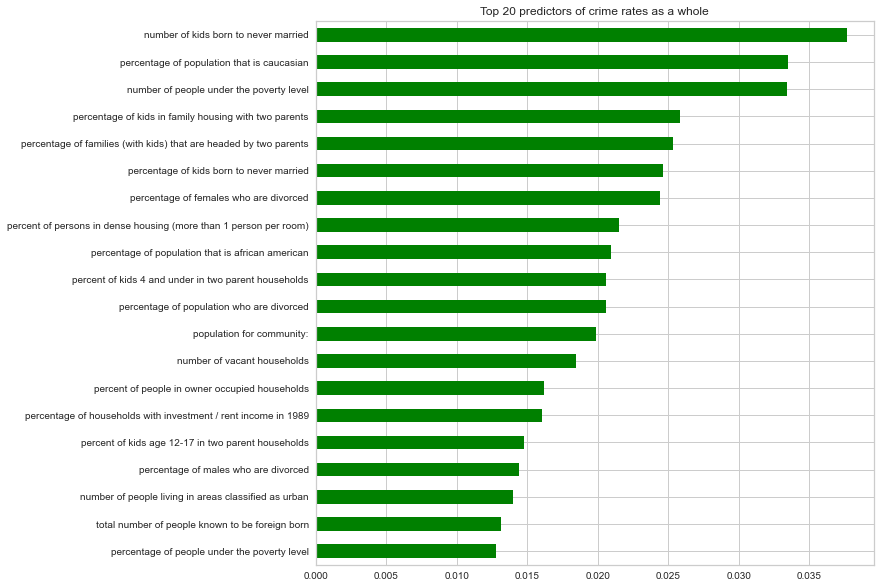

In [176]:
# Direct feature importances
import matplotlib.pyplot as plt

n = 20
importances = rf_model.named_steps['randomforestregressor'].feature_importances_
descriptions = [column_descriptions[col] for col in X_train.columns]
important_descriptons = pd.Series(importances, descriptions)
important_columns_direct = pd.Series(importances, X_train.columns)

plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} predictors of crime rates as a whole')
important_descriptons.sort_values(ascending=True)[-n:].plot.barh(color='green');

### Permutation Feature Importances ###

In [133]:
import eli5
from eli5.sklearn import PermutationImportance
from category_encoders import OrdinalEncoder

# The permuter needs all numeric data
encoder = OrdinalEncoder(cols=['state'])
X_val_encoded = encoder.fit_transform(X_val)

# Make and fit the permuter (most of the work)
perm = PermutationImportance(rf_model, n_iter=5)
perm.fit(X_val_encoded, Y_val)

# Show the answer
eli5.show_weights(
    perm,
    top = 20,
    feature_names = descriptions
)

Weight,Feature
0.0139 ± 0.0055,percentage of population that is caucasian
0.0112 ± 0.0026,number of kids born to never married
0.0098 ± 0.0060,percentage of kids in family housing with two parents
0.0093 ± 0.0013,percentage of population that is african american
0.0081 ± 0.0026,percentage of families (with kids) that are headed by two parents
0.0077 ± 0.0028,percentage of females who are divorced
0.0065 ± 0.0030,percent of persons in dense housing (more than 1 person per room)
0.0051 ± 0.0037,percentage of population who are divorced
0.0050 ± 0.0027,number of people under the poverty level
0.0044 ± 0.0024,percentage of kids born to never married


### Drop Column Feature Importances ###

In [160]:
# Drop-column feature importances

# First encode for speed
encoder = OrdinalEncoder(cols=['state'])
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

# Pipeline to reuse
pipeline = make_pipeline(
    RandomForestRegressor(
        max_features='log2',
        bootstrap=False,
        n_estimators=684,
        random_state=0,
        n_jobs=-1),
)

# Fit with column
pipeline.fit(X_train_encoded, Y_train)
score_all = pipeline.score(X_val_encoded, Y_val)
print(f'Original Validation Accuracy: {score_all}')

# Fit without columns
drop_column_importances = {}
for column in X_train.columns:
    pipeline.fit(X_train_encoded.drop(columns=[column]), Y_train)
    score_without = pipeline.score(X_val_encoded.drop(columns=[column]), Y_val)
#     print(f'Validation Accuracy without {column}: {score_without}')
    # Compare the error with & without column
    drop_column_importances[column] = 1-score_without/score_all
    print(f'Drop-Column Importance for {column}: {1-score_without/score_all}')


Original Validation Accuracy: 0.4520468549113821
Drop-Column Importance for state: 0.002323581897007543
Drop-Column Importance for population: 0.0017624350971040537
Drop-Column Importance for householdsize: 0.002340305842455259
Drop-Column Importance for racepctblack: 0.0107468999069813
Drop-Column Importance for racePctWhite: 0.012360422035456842
Drop-Column Importance for racePctAsian: 0.0035617245571331058
Drop-Column Importance for racePctHisp: 0.003227854266294128
Drop-Column Importance for agePct12t21: 0.002832983376940823
Drop-Column Importance for agePct12t29: 0.0026089316723330036
Drop-Column Importance for agePct16t24: 0.0021141102573735138
Drop-Column Importance for agePct65up: 0.005018959054100658
Drop-Column Importance for numbUrban: -0.0007972768428285981
Drop-Column Importance for pctUrban: 0.007127973987936076
Drop-Column Importance for medIncome: 0.003443962796508493
Drop-Column Importance for pctWWage: 0.0014924393534554437
Drop-Column Importance for pctWFarmSelf: 0.0

### Single Column Feature Importances ###

In [215]:
# Single-column feature importances

# First encode for speed
encoder = OrdinalEncoder(cols=['state'])
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

# Pipeline to reuse
pipeline = make_pipeline(
    RandomForestRegressor(
        max_features='log2',
        bootstrap=False,
        n_estimators=684,
        random_state=0,
        n_jobs=-1),
)

# Fit with column
# pipeline.fit(X_train_encoded, Y_train)
# score_all = pipeline.score(X_val_encoded, Y_val)
# print(f'Original Validation Accuracy: {score_all}')

# Fit with one column at a time
scores = []
columns = X_train.columns
for column in columns:
    column_train = np.expand_dims(X_train_encoded[column], axis=1)  # has to be a 2D array
    column_val = np.expand_dims(X_val_encoded[column], axis=1)  # has to be a 2D array
    pipeline.fit(column_train, Y_train)
    score = pipeline.score(column_val, Y_val)
    scores.append(score)
    print(f'Single-Column Importance for {column}: {score}')
single_column_importances = pd.Series(scores, columns)

# Why are these mostly negative? That's not right.

Single-Column Importance for state: 0.1967710253646137
Single-Column Importance for population: -0.664256671773402
Single-Column Importance for householdsize: -0.04660035929915965
Single-Column Importance for racepctblack: -0.3355114130499114
Single-Column Importance for racePctWhite: -0.37261001015832995
Single-Column Importance for racePctAsian: -0.3875144076112875
Single-Column Importance for racePctHisp: -0.5078864112021755
Single-Column Importance for agePct12t21: -0.6910249740820634
Single-Column Importance for agePct12t29: -0.7219102844538893
Single-Column Importance for agePct16t24: -0.561892548853666
Single-Column Importance for agePct65up: -0.8206657045186209
Single-Column Importance for numbUrban: -0.34133773924867183
Single-Column Importance for pctUrban: -0.07999985570142738
Single-Column Importance for medIncome: -0.5883758295166375
Single-Column Importance for pctWWage: -0.6769795904408022
Single-Column Importance for pctWFarmSelf: -0.23781302588860406
Single-Column Impo

In [223]:
columns = X_train.columns
X_descriptions = {key:value for key, value in column_descriptions.items() if key in columns}
feature_importances = pd.concat({
    'Description':pd.Series(X_descriptions),
    'Direct Importance':important_columns_direct,
    'Permutation': pd.Series(perm.feature_importances_, columns),
    'Drop-Column': pd.Series(drop_column_importances),
    'Single-Column': single_column_importances},
          axis=1,
          sort=True)
feature_importances

,Description,Direct Importance,Permutation,Drop-Column,Single-Column
AsianPerCap,per capita income for people with asian heritage,0.006643,7.735762e-05,-0.000953,-0.643673
FemalePctDiv,percentage of females who are divorced,0.024401,7.696591e-03,0.009298,-0.222539
HispPerCap,per capita income for people with hispanic her...,0.007079,6.296214e-05,0.001979,-0.891749
HousVacant,number of vacant households,0.018453,1.148559e-03,-0.004989,-0.421525
LandArea,land area in square miles,0.008559,-2.395530e-04,0.003805,-0.352925
LemasPctOfficDrugUn,percent of officers assigned to drug units,0.002986,2.337642e-04,0.004329,0.018522
MalePctDivorce,percentage of males who are divorced,0.014400,4.218532e-03,0.008337,-0.286202
MalePctNevMarr,percentage of males who have never married,0.006861,5.994988e-04,0.003162,-0.618739
MedNumBR,median number of bedrooms,0.001807,2.040046e-04,0.004850,0.094856
MedOwnCostPctInc,median owners cost as a percentage of househol...,0.006706,4.419043e-04,0.006129,-0.081298


<Figure size 792x648 with 0 Axes>

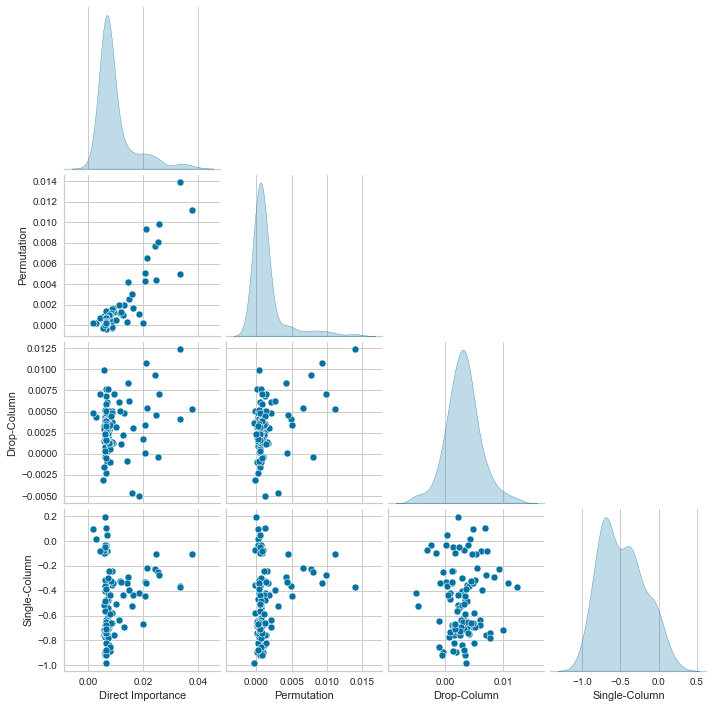

In [227]:
import seaborn as sms
import matplotlib.pyplot as plt

plt.figure(figsize=(11,9))
sns.pairplot(feature_importances, corner=True, diag_kind="kde", height=2.5);
# title="Pairplot of feature importances"

### Total Importance Compared with R^2 ###

### Correlation Map ###

<AxesSubplot:>

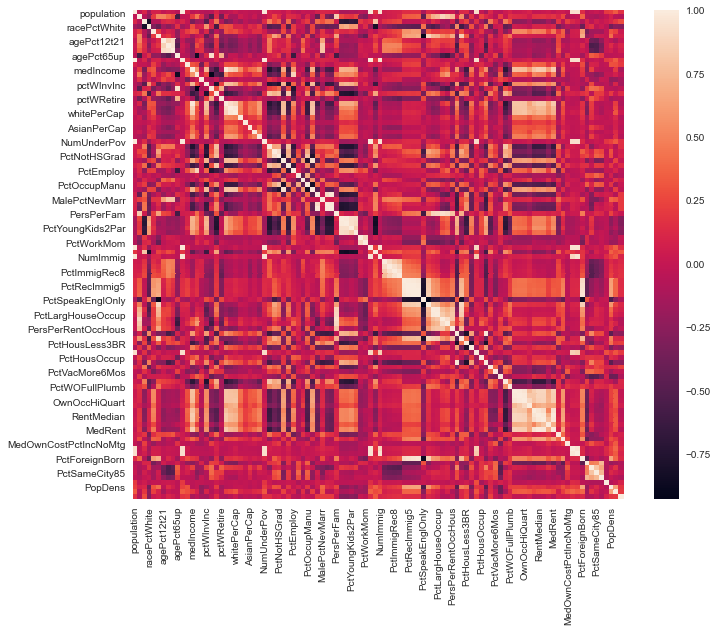

In [167]:

import seaborn as sms
import matplotlib.pyplot as plt

plt.figure(figsize=(11,9))
sms.heatmap(X_train.corr())

### PCA - Principal Component Analysis ###

### PCA Correlation Map ###

### A Model from PCA ###

### Drop Column Importances for PCA components ###

### Brining it back to the importance of our regular features ###

### A better way to measure feature importance ###

## Explaining Specific Predictions ##

### ELI5 ###

In [ ]:
# https://towardsdatascience.com/explainable-artificial-intelligence-part-3-hands-on-machine-learning-model-interpretation-e8ebe5afc608

### PDP Plots ###
https://github.com/SauceCat/PDPbox#gallery

In [232]:
# Get a ranked list of the most important features by Direct Importance
feature_importances.sort_values(by='Direct Importance', ascending=False).head(15)

,Description,Direct Importance,Permutation,Drop-Column,Single-Column
NumKidsBornNeverMar,number of kids born to never married,0.037678,0.011175,0.005248,-0.100540
racePctWhite,percentage of population that is caucasian,0.033489,0.013925,0.012360,-0.372610
NumUnderPov,number of people under the poverty level,0.033438,0.004951,0.004073,-0.361218
PctKids2Par,percentage of kids in family housing with two ...,0.025792,0.009832,0.007103,-0.271033
PctFam2Par,percentage of families (with kids) that are he...,0.025306,0.008060,-0.000375,-0.249335
PctKidsBornNeverMar,percentage of kids born to never married,0.024609,0.004407,0.004647,-0.101119
FemalePctDiv,percentage of females who are divorced,0.024401,0.007697,0.009298,-0.222539
PctPersDenseHous,percent of persons in dense housing (more than...,0.021505,0.006548,0.005440,-0.214021
racepctblack,percentage of population that is african american,0.020898,0.009318,0.010747,-0.335511
PctYoungKids2Par,percent of kids 4 and under in two parent hous...,0.020570,0.004275,0.000154,-0.325854


In [338]:
# Our Optimized Random Forest model
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor

# rf_model = make_pipeline(
#     OrdinalEncoder(cols=['state']),
#     RandomForestRegressor(
#         max_features='log2',
#         bootstrap=False,
#         n_estimators=684,
#         random_state=0,
#         n_jobs=-1),
#     )
# rf_model.fit(X_train, Y_train);

encoder = OrdinalEncoder(cols=['state'])
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
rf_model = RandomForestRegressor(
        max_features='log2',
        bootstrap=False,
        n_estimators=684,
        random_state=0,
        n_jobs=-1,
)
rf_model.fit(X_train_encoded, Y_train)
# rf_model.classes_ = Y_train.columns.to_numpy()  # this is in RandomForestClassifier, but missing in RandomForestRegressor
# rf_model.n_classes_ = 8

val_pred = rf_model.predict(X_val_encoded)

print("Optimized Random Forest Model - Improvements in MAE over Baseline")
print("On Validation Data")
improvements = get_improvements(val_pred, Y_val)
print(improvements)
print(f"Total Improvement = {100*improvements.sum():.2f}%")

Optimized Random Forest Model - Improvements in MAE over Baseline
On Validation Data
murdPerPop         0.388252
rapesPerPop        0.132053
robbbPerPop        0.410190
assaultPerPop      0.346930
burglPerPop        0.399705
larcPerPop         0.305133
autoTheftPerPop    0.403629
arsonsPerPop       0.077882
dtype: float64
Total Improvement = 246.38%


In [253]:
X_val.shape

(305, 103)

In [270]:
len(X_val.columns.to_list())

103

In [335]:
from pdpbox import pdp


pdp_NumKidsBornNeverMar = pdp.pdp_isolate(
    model = rf_model,
    dataset = pd.concat([X_val_encoded,Y_val], axis=1).reset_index(),
    model_features = X_val.columns.to_list(),
    feature = 'NumKidsBornNeverMar')

# fig, axes = pdp.pdp_plot(
#     pdp_isolate_out=pdp_NumKidsBornNeverMar,
#     feature_name='NumKidsBornNeverMar',
#     center=True,
#     x_quantile=True,
#     ncols=2,
#     plot_lines=True,
#     frac_to_plot=100)



# isolated = pdp_isolate(
#     model = rf_model,
#     dataset = X_val,
#     model_features = X_val.columns,
#     num_grid_points = 50,
#     feature = feature
# )

# pdp_plot(
#     isolated,
#     feature_name = feature,
#     plot_lines = True,
#     frac_to_plot = 0.03,
#     plot_params = {
#         # plot title and subtitle
#         'title': 'PDP for feature "%s"' % feature_name,
#         'subtitle': "Number of unique grid points: %d" % n_grids,
#         'title_fontsize': 15,
#         'subtitle_fontsize': 12,
#         'font_family': 'Arial',
#         # matplotlib color map for ICE lines
#         'line_cmap': 'Blues',
#         'xticks_rotation': 0,
#         # pdp line color, highlight color and line width
#         'pdp_color': '#1A4E5D',
#         'pdp_hl_color': '#FEDC00',
#         'pdp_linewidth': 1.5,
#         # horizon zero line color and with
#         'zero_color': '#E75438',
#         'zero_linewidth': 1,
#         # pdp std fill color and alpha
#         'fill_color': '#66C2D7',
#         'fill_alpha': 0.2,
#         # marker size for pdp line
#         'markersize': 3.5,
# },
# )
# plt.ylim((-0.1, 1))

ValueError: Shape of passed values is (305, 8), indices imply (305, 1)

In [327]:
Y_train.columns.to_numpy()

array(['murdPerPop', 'rapesPerPop', 'robbbPerPop', 'assaultPerPop',
       'burglPerPop', 'larcPerPop', 'autoTheftPerPop', 'arsonsPerPop'],
      dtype=object)

In [328]:
rf_model.classes_ = Y_train.columns.to_numpy()
# 103 features
# 8 targets
# 305 observations

In [336]:
rf_model.n_outputs_

8

In [339]:
otto['rf_model'].n_classes_

9

In [337]:
otto['rf_model'].n_outputs_
# 93 features
# 9 targets
# 61878 observations

1

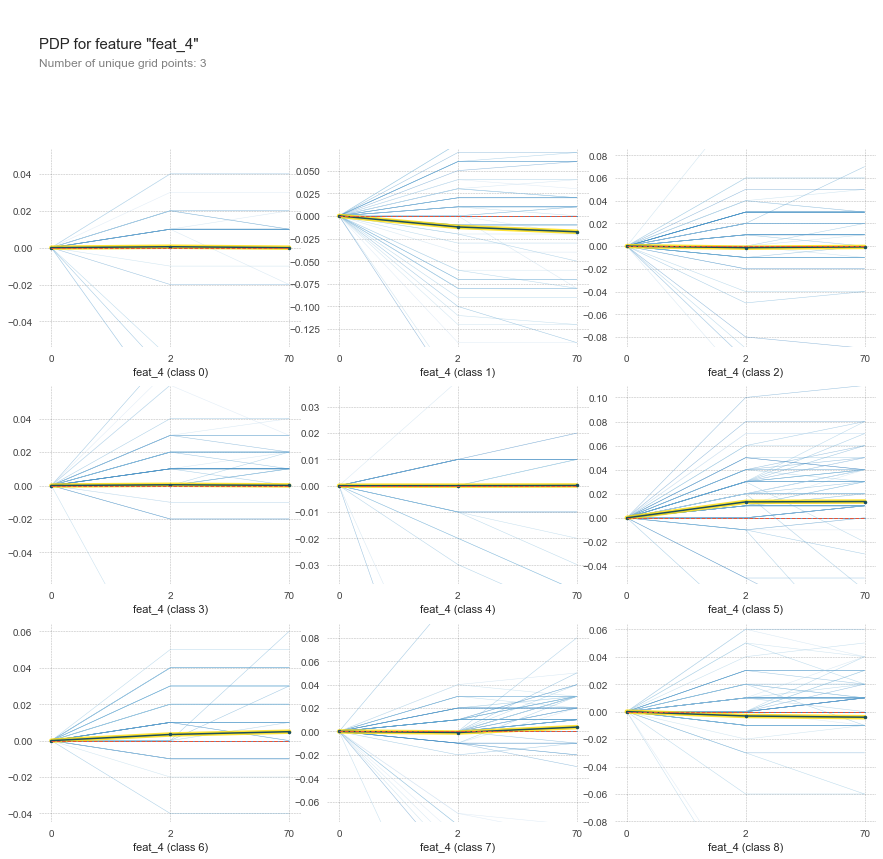

In [282]:
from pdpbox import pdp, get_dataset

otto = get_dataset.otto()

pdp_feat_67_rf = pdp.pdp_isolate(model = otto['rf_model'],
                                 dataset = otto['data'],
                                 model_features = otto['features'],
                                 feature = 'feat_4')
fig, axes = pdp.pdp_plot(pdp_isolate_out = pdp_feat_67_rf,
                         feature_name = 'feat_4',
                         center=True,
                         x_quantile=True,
                         ncols=3,
                         plot_lines=True,
                         frac_to_plot=100)

### SHAP ###

-2 examples of high crime, low accuracy

-2 examples of high crime, high accuracy

-2 examples of low crime, low accuracy

-2 examples of low crime, high accuracy

There might be more tricks and treats in here

https://towardsdatascience.com/explainable-artificial-intelligence-part-3-hands-on-machine-learning-model-interpretation-e8ebe5afc608

# Model Applicability #

Dicussion on prediction is not causation

## What is the confidence interval of crime rate for a single community? ##

The mean absolute error is fine for an error metric. It tells you how much better your model is doing vs a baseline. But when someone asked me "what does this tell me about crime rates? How much more or less crime are we really talking here?" My model will predict the crime rate, but only as one number. That doesn't tell you how off the model might be, or what the confidence interval is. A better answer would be to show the original spread in crime rates, and the narrowed confidence interval once you know a few things about the community. To do this, lets graph the original distribution of crime rates, and then how a probability distribution of the prediction narrows with more and more knowledge.

Make a nested kde distribution of crime rates from naive to everything we know.

https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

In [ ]:
average_over = val_mean + base_mae
average_under = val_mean - base_mae

val_mean_unlog = np.e**val_mean
average_over_unlog = np.e**average_over
average_under_unlog = np.e**average_under
print(f'Unlogged:')
print(f'val_mean_unlog {val_mean_unlog}')
print(f'average_over_unlog {average_over_unlog}')
print(f'average_under_unlog {average_under_unlog}')

## How Small Can the Model Be? ##

Model score vs k best features

Compare the cumulative distribution of training times vs the best model chosen above.


## How Cheap Can the Model Be? ##

What are the primary sources for this data, and how much does it cost?

## Compute an improvement vector for a few communities ##